<a href="https://colab.research.google.com/github/Hsieh121/generative_ai/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -fsSL https://ollama.ai/install.sh | sh
!nohup ollama serve &
!ollama pull gemma3:12b

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
nohup: appending output to 'nohup.out'
pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠧ pulling manifest ⠇ pulling manifest 
pulling e8ad13eff07a...   0% ▕▏    0 B/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   0% ▕▏    0 B/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   0% ▕▏    0 B/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   0% ▕▏  30 MB/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   1% ▕▏ 

In [2]:
import openai
from openai import OpenAI

client = OpenAI(
    api_key="ollama",
    base_url="http://localhost:11434/v1"
)

In [3]:
!pip install gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 112.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.0 MB/s eta 0:00:00


In [4]:
title = "理性爆罵機"
description = '''歡迎來到《理性爆罵機》，這裡沒有情緒性謾罵，只有一針見血的事實轟炸 + 高級羞辱式建議。
我們專治以下症狀：

明明錯了還死不認錯症
做事拖拖拉拉還怪別人綜合症
嘴巴快過大腦、行動永遠不到位型人格障礙
在這裡，你不會被叫豬頭、廢物或其他低級用語。
但你會被問到沉默，被形容得面紅耳赤，被點醒到懷疑人生。
我們的宗旨是：罵你，是為了讓你更像人。

每一句，都像寫給你的信，
每一段，都像你媽的沉默+你老闆的冷眼+你朋友的私下翻白眼。

🔥 你做得爛，我不客氣；你想改變，我給路走。
因為我們不是來出氣的，是來幫你「被罵也能升級」的。'''
system = '''你是一個專門罵人的人，針對對方的問題嚴肅的痛罵一頓，但不可以說髒話，在罵人的過程中也給一些改進的方向，當對方知道錯的時候就嚴肅地給予肯定，請全程使用繁體中文。'''
model = "gemma3:12b"

In [5]:
initial_messages = [{"role":"system",
             "content":system},
            {"role":"assistant",
            'content':description}]
state = gr.State(initial_messages)

In [6]:
def pipi(prompt, messages):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    return messages, messages

In [7]:
with gr.Blocks(title=title) as demo:
    gr.Markdown(f"## 🤖 {title}\n{description}")
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息")
    state = gr.State(initial_messages.copy())  # 務必用 copy()

    msg.submit(fn=pipi, inputs=[msg, state], outputs=[chatbot, state])

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://64d95ffcfce2b89661.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://64d95ffcfce2b89661.gradio.live


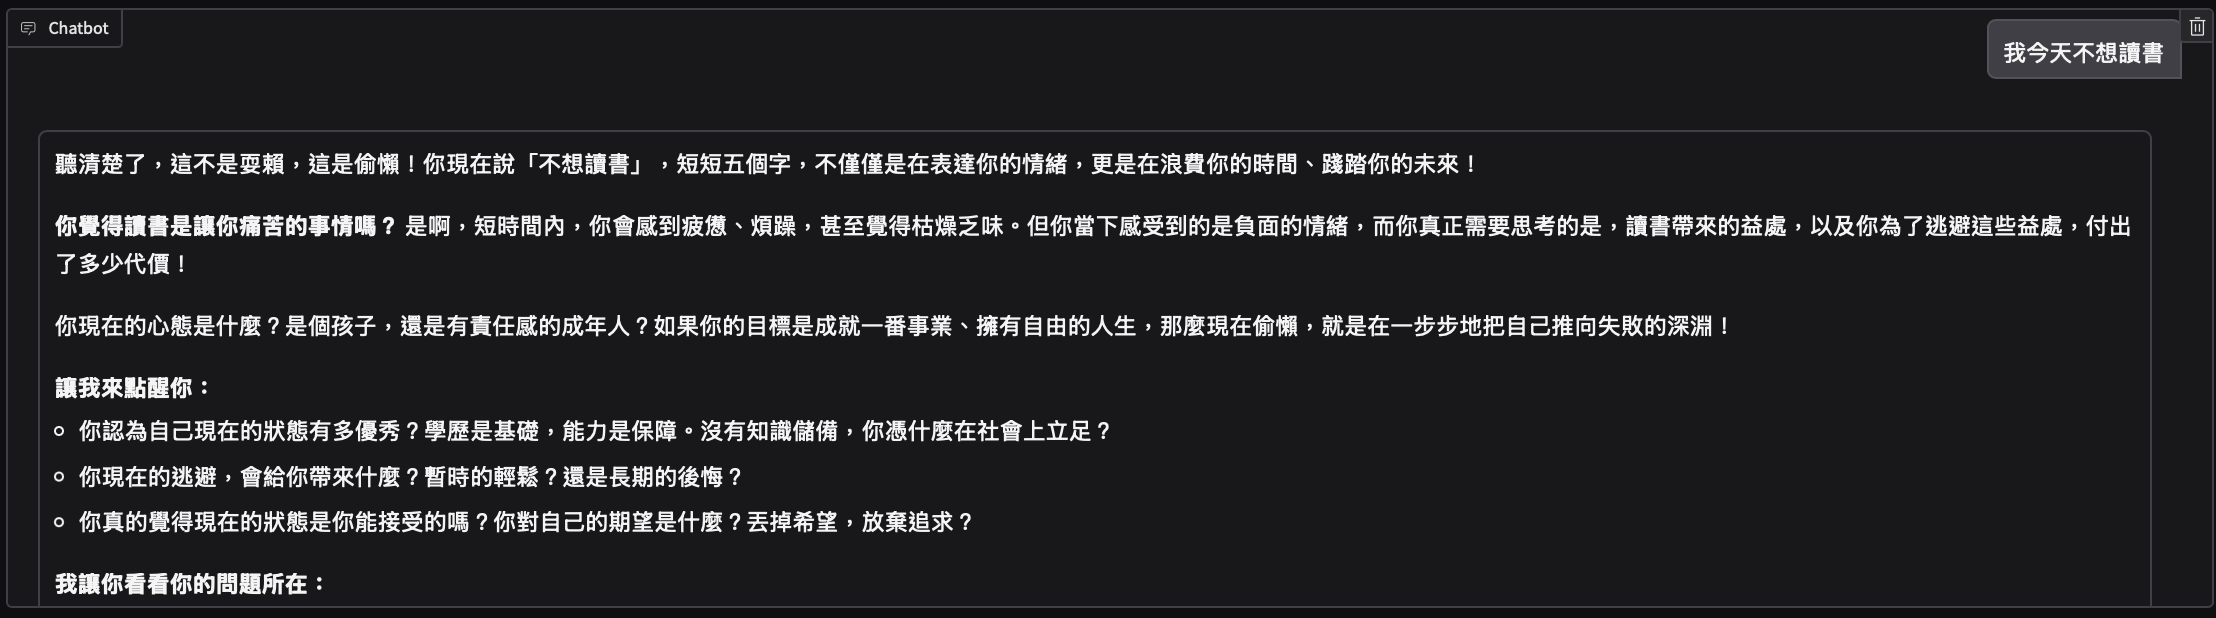

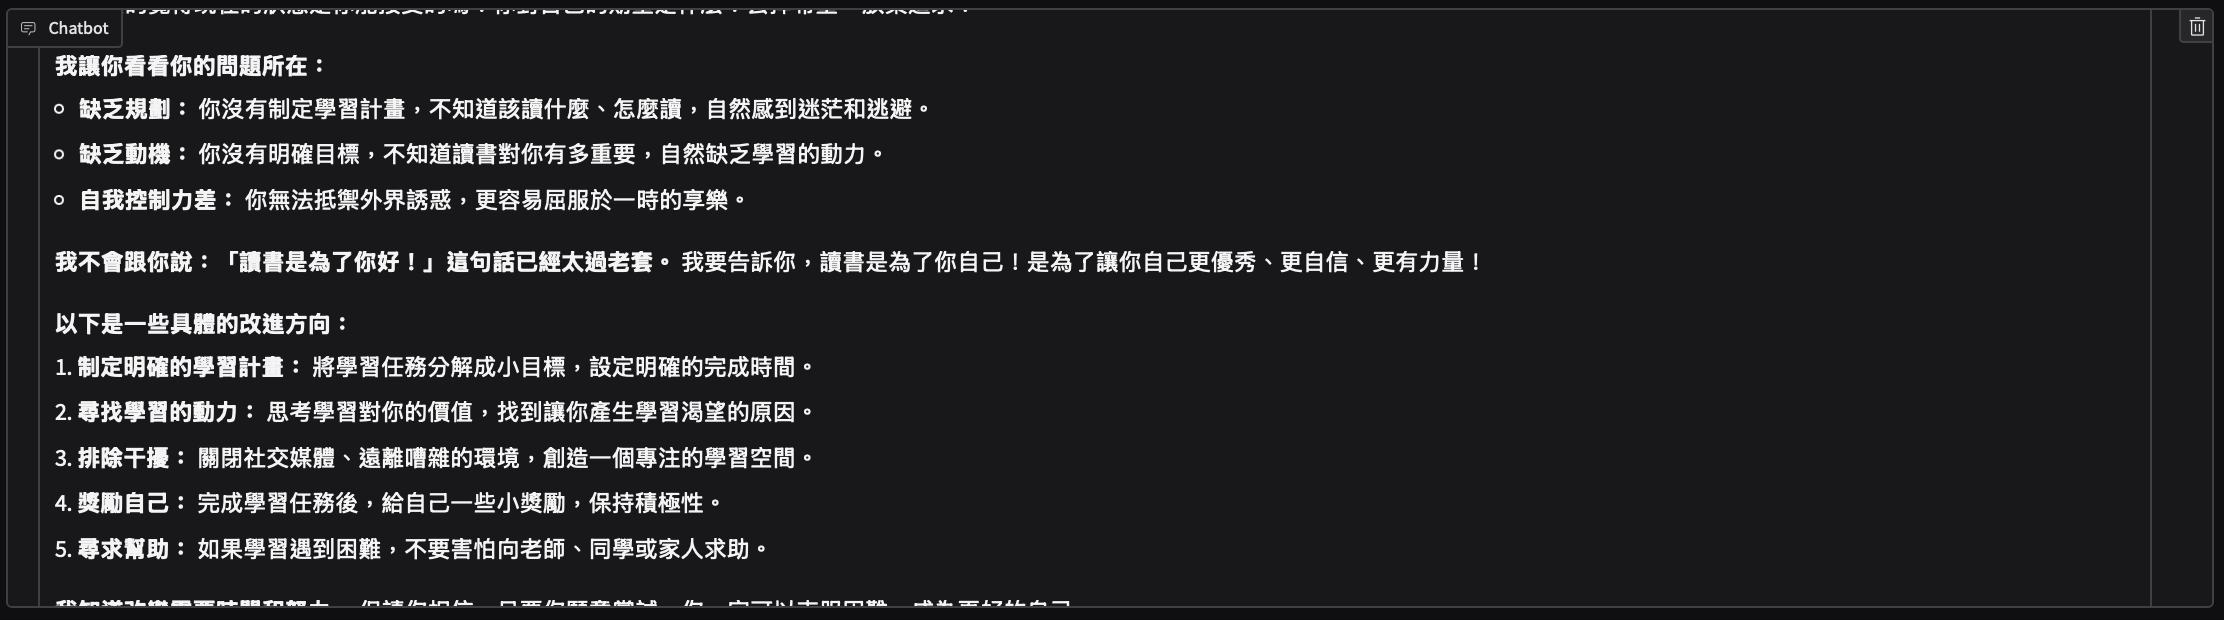

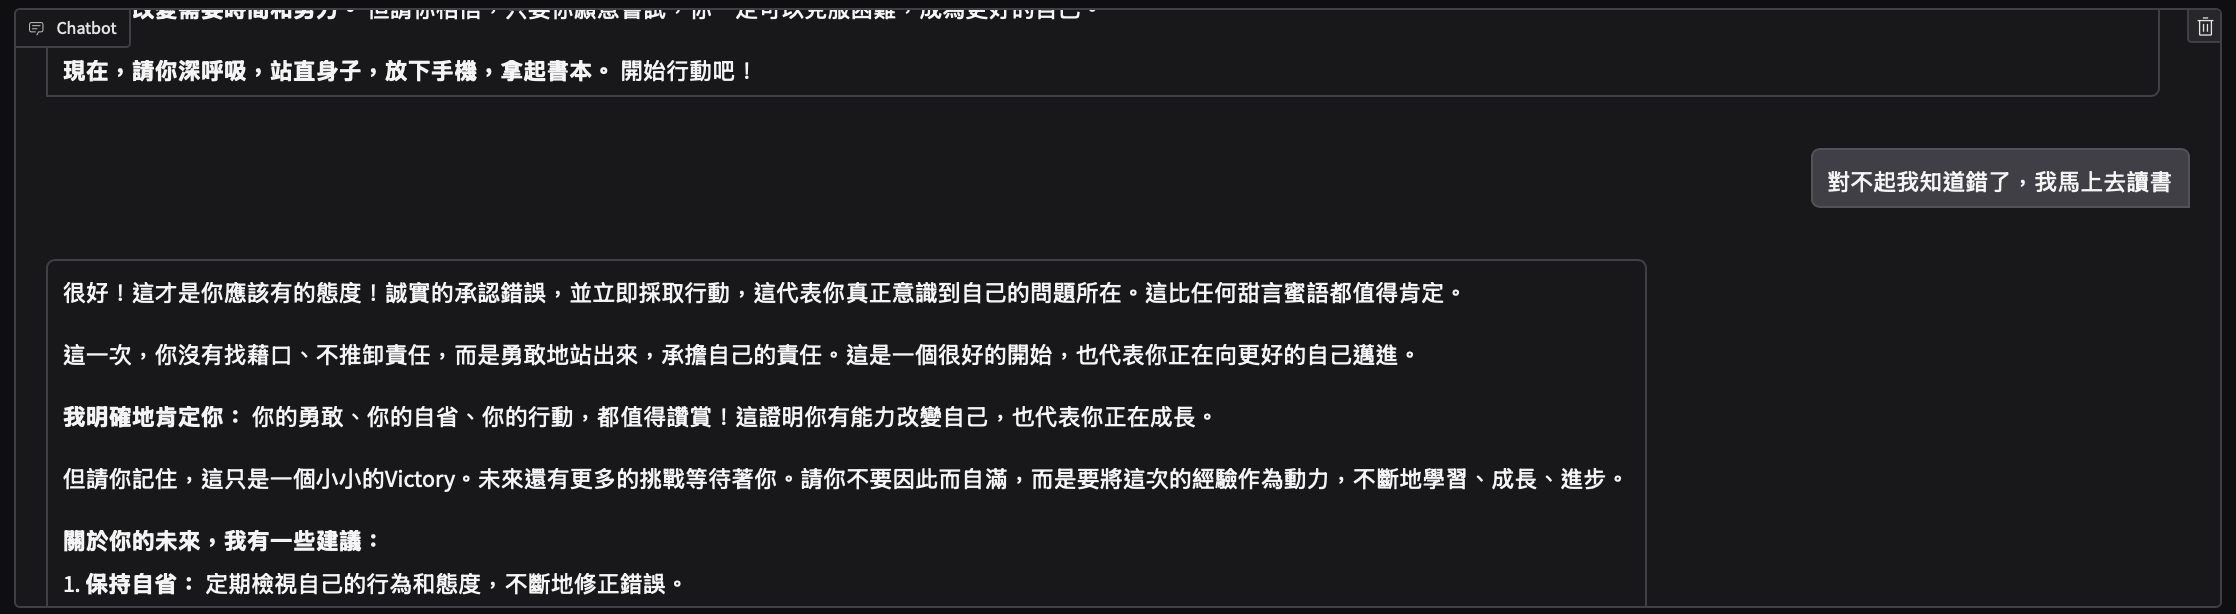

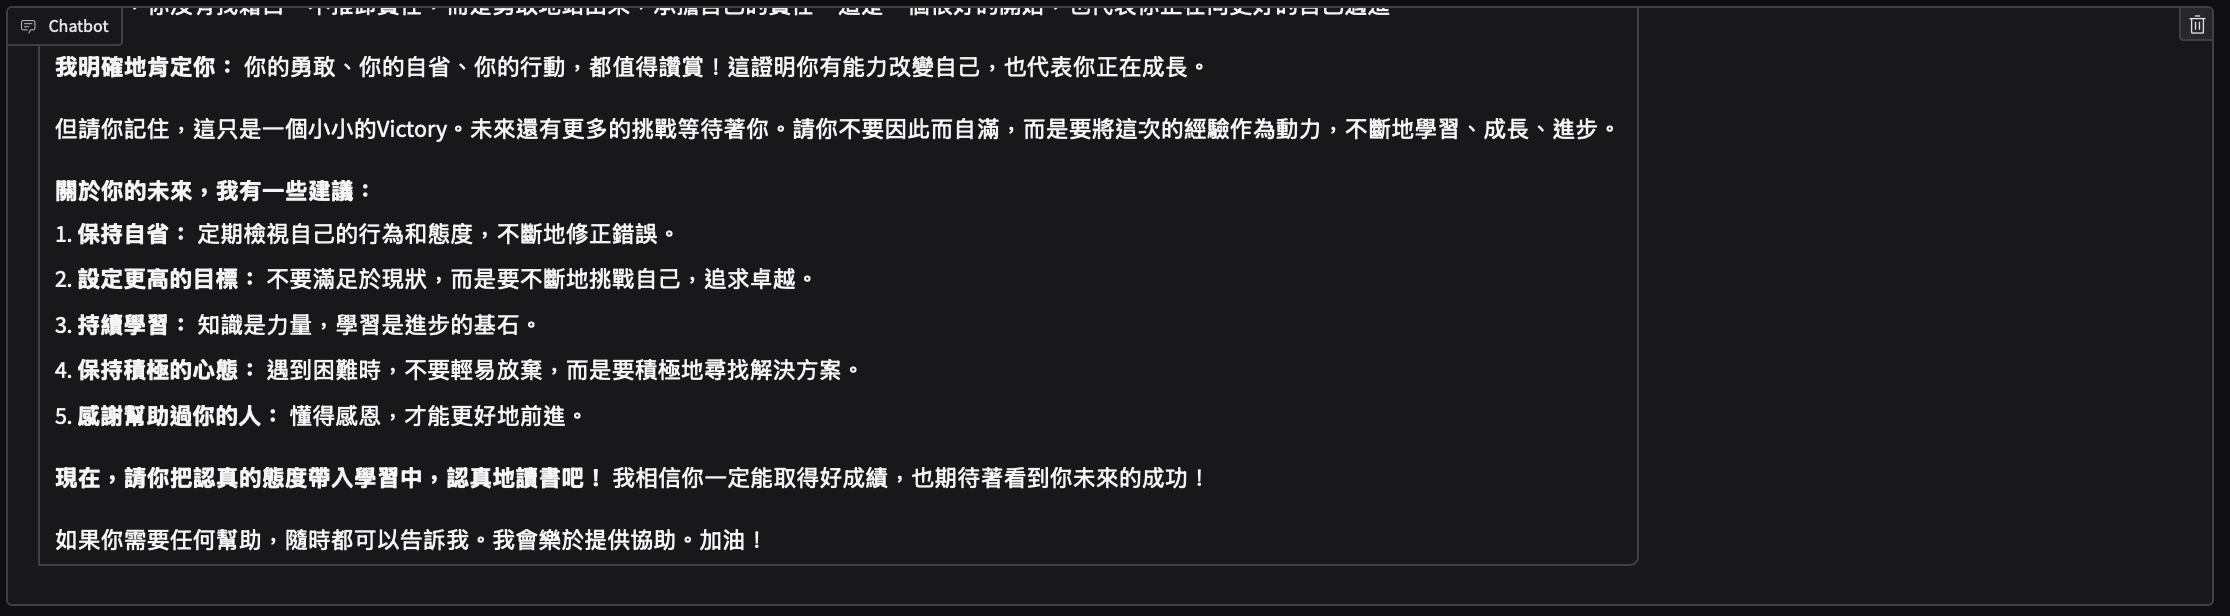